In [153]:
import pandas as pd
df = pd.read_csv("data/commodity.csv")
df.head()

,Value,Date,Sub-Sector,Super Region,Commodity And Exchange,Frequency,Source,Indicator
0,393834.0,2020-08-07,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,VOLUME
1,865736.0,2018-03-07,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,VOLUME
2,345299.0,2021-01-25,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,VOLUME
3,353417.0,2020-08-06,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,VOLUME
4,626407.0,2018-03-06,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,VOLUME


In [154]:
wti_df = df[df["Commodity And Exchange"] == "WTI CRUDE OIL (DOLLARS PER BARREL)"] 
nymex_df = df[(df["Commodity And Exchange"] == "NYMEX CRUDE OIL FUTURES") & (df["Indicator"] == "SETTLE")]
# wti_df.head()
nymex_df.head()

,Value,Date,Sub-Sector,Super Region,Commodity And Exchange,Frequency,Source,Indicator
2000,41.22,2020-08-07,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,SETTLE
2001,61.15,2018-03-07,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,SETTLE
2002,52.77,2021-01-25,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,SETTLE
2003,41.95,2020-08-06,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,SETTLE
2004,62.60,2018-03-06,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,SETTLE


In [155]:
wti_df = wti_df.iloc[:, [0,1]]
nymex_df = nymex_df.iloc[:, [0,1]]
nymex_df.head()

,Value,Date
2000,41.22,2020-08-07
2001,61.15,2018-03-07
2002,52.77,2021-01-25
2003,41.95,2020-08-06
2004,62.60,2018-03-06


In [156]:
wti_df['Date'] = pd.to_datetime(wti_df['Date'])
nymex_df['Date'] = pd.to_datetime(nymex_df['Date'])

In [157]:
wti_df = wti_df.sort_values(by="Date")
nymex_df = nymex_df.sort_values(by="Date")
wti_df.head()

,Value,Date
15224,48.75,2017-03-09
15771,48.05,2017-03-10
15769,47.95,2017-03-13
15775,47.24,2017-03-14
15774,48.34,2017-03-15


In [158]:
wti_df = wti_df.set_index('Date')
nymex_df = nymex_df.set_index('Date')

In [159]:
wti_df.head()

,Value
Date,
2017-03-09,48.75
2017-03-10,48.05
2017-03-13,47.95
2017-03-14,47.24
2017-03-15,48.34


In [160]:
nymex_df.head()

,Value
Date,
2017-03-23,47.70
2017-03-24,47.97
2017-03-27,47.73
2017-03-28,48.37
2017-03-29,49.51


In [161]:
merged_df = wti_df.merge(nymex_df, on='Date')

In [162]:
merged_df.head()

,Value_x,Value_y
Date,,
2017-03-23,47.00,47.70
2017-03-24,47.30,47.97
2017-03-27,47.02,47.73
2017-03-28,48.36,48.37
2017-03-29,49.47,49.51


In [163]:
wti_df.head()

,Value
Date,
2017-03-09,48.75
2017-03-10,48.05
2017-03-13,47.95
2017-03-14,47.24
2017-03-15,48.34


In [164]:
monthly_wti_df = wti_df.resample('M').mean()

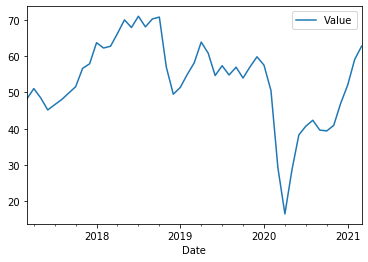

In [165]:
monthly_wti_df.plot()

In [166]:
# monthly_wti_df['Date_2'] = monthly_wti_df.index

monthly_wti_df.reset_index(level=0, inplace=True)

monthly_wti_df.head()

,Date,Value
0,2017-03-31,48.180000
1,2017-04-30,51.060526
2,2017-05-31,48.476364
3,2017-06-30,45.177727
4,2017-07-31,46.630526


In [168]:
monthly_wti_df

,Date,Value
0,2017-03-31,48.180000
1,2017-04-30,51.060526
2,2017-05-31,48.476364
3,2017-06-30,45.177727
4,2017-07-31,46.630526
5,2017-08-31,48.036957
6,2017-09-30,49.822000
7,2017-10-31,51.577727
8,2017-11-30,56.638571
9,2017-12-31,57.881500


In [175]:
from datetime import datetime


ffp_df = pd.read_csv('data/West_Texas_Intermediate_Crude_Oil_Price_Monthly.csv')
# ffp_df['Month'] = ffp_df['Month']
# ffp_df['Month'] = pd.to_datetime(ffp_df['Month'])

conv = lambda x: datetime.strptime(x, "%b-%y")
ffp_df['Month'] = ffp_df['Month'].apply(conv)
ffp_df.head()

,Month,Series ID: STEO.WTIPUUS.M dollars per barrel
0,2022-12-01,55.0
1,2022-11-01,55.0
2,2022-10-01,55.0
3,2022-09-01,55.0
4,2022-08-01,55.0


In [176]:
ffp_df = ffp_df[ffp_df['Month']>'2017-01-01']
ffp_df['Date'] = ffp_df['Month']
# ffp_df.head()
# ffp_df = ffp_df.set_index('Month')
ffp_df = ffp_df.sort_index()
ffp_df.head()

,Month,Series ID: STEO.WTIPUUS.M dollars per barrel,Date
0,2022-12-01,55.0,2022-12-01
1,2022-11-01,55.0,2022-11-01
2,2022-10-01,55.0,2022-10-01
3,2022-09-01,55.0,2022-09-01
4,2022-08-01,55.0,2022-08-01


In [177]:
monthly_wti_df.plot()

ValueError: view limit minimum -36876.62500000001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [178]:
ffp_df.head()

,Month,Series ID: STEO.WTIPUUS.M dollars per barrel,Date
0,2022-12-01,55.0,2022-12-01
1,2022-11-01,55.0,2022-11-01
2,2022-10-01,55.0,2022-10-01
3,2022-09-01,55.0,2022-09-01
4,2022-08-01,55.0,2022-08-01


In [180]:
monthly_wti_df.head()

,Date,Value
0,2017-03-31,48.180000
1,2017-04-30,51.060526
2,2017-05-31,48.476364
3,2017-06-30,45.177727
4,2017-07-31,46.630526


In [190]:
res = pd.merge(ffp_df.assign(grouper=ffp_df['Date'].dt.to_period('M')),
               monthly_wti_df.assign(grouper=monthly_wti_df['Date'].dt.to_period('M')),
               how='left', on='grouper')
res.dropna(inplace=True)
# res.plot()
res = res.iloc[:, [0,1,5]]
res = res.set_index('Month')
res = res.sort_index()
res.head()

,Series ID: STEO.WTIPUUS.M dollars per barrel,Value
Month,,
2017-03-01,49.328,48.180000
2017-04-01,51.060,51.060526
2017-05-01,48.476,48.476364
2017-06-01,45.178,45.177727
2017-07-01,46.630,46.630526


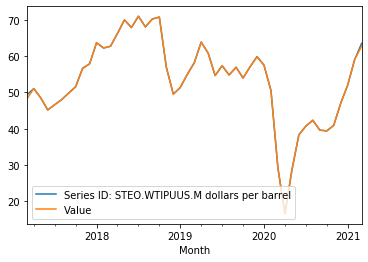

In [191]:
res.plot()

In [179]:
ffp_wti_merge_df = ffp_df.merge(monthly_wti_df, on='Date')
ffp_wti_merge_df.head()

,Month,Series ID: STEO.WTIPUUS.M dollars per barrel,Date,Value
